## Baye's Theorem

$$ P(x|y) = \frac{P(x,y)}{P(y)} $$

- so the joint probability can be recovered from $$ P(x,y) = P(y|x) P(x) $$

- the expectation value of $y$ is $$\left< y \right> = \int y P(x,y) dx dy $$
  
- suppose we had an observation of $x$. Instead of using $P(x,y)$ we could use $P(y|x)$ and instead calculate $$\left< y | x \right> = \int y P(y|x) dy $$

## What is np.dot doing?

- If we have two arrays $X_{ij}$ and $Y_{ik}$ then $$Z = \mathrm{np.dot}\left(X,Y\right) \rightarrow Z_{ij} = \sum_{k} X_{ik}Y_{kj}$$
  
- This is also called the matrix product, in matrix notation we would write $Z=XY$

- if $X$ is MxN in size, and $Y$ is NxK in size, then $Z$ will be MxK in size. 

- if $X$ is a Nx1, then there are two ways to do the matrix product 
  - $X^T X$: this will be a 1xN matrix times a Nx1 matrix, so its a 1x1 matrix, e.g. a scalar. 
    - this is the same as a vector dot product 
  - $X X^T$: this will be an Nx1 matrix times a 1XN matrix, so its a NXN matrix. 

- inagine we have two datasets with M data points (imagine grid points) which each have N records (imagine times). Then we can take the mean out of each data set at each point, and use the dot product to calculate the covariance matrix, since $$X'^T Y' = N\overline{X'Y'}$$ because the matrix product is multiplying all the values in time and summing them. The new matrix will be MxM.
  
- Note if you want to push this logic to its multidimensional extreme, check out np.einsum

## Multivariate Gaussians

- imagine we have a set of N variables. Now put them into a vector $\vec{x}$. The mean vector is $\vec{\mu}=\left<\vec{x}\right>$, and the covariance matrix is $$\Gamma = \left<\vec{x}\vec{x}^T\right> - \vec{\mu}\vec{\mu}^T$$

    - note that since $X$ is Nx1, $X^T$ is 1xN, so $\Gamma$ is NxN.

- The multivariate Gaussian distribution is $$\mathrm{N}(\vec{x},\vec{\mu},\Gamma)=\frac{1}{\sqrt{(2\pi)^N\mathrm{det}(\Gamma)}}\exp\left(-\frac{1}{2}\left(\vec{x}-\vec{\mu}\right)^T\Gamma^{-1}\left(\vec{x}-\vec{\mu}\right)\right)$$

- This expression looks intimidating, but we can think about it for the N=2 case. Imagine that $x$ and $y$ are two variables, and that they have mean 0, equal standard deviations, and correlation $\rho$. 
- The covariance matrix is $\Gamma =\begin{pmatrix} \left<x'x'\right> & \left<y'x'\right> \\ \left<x'y'\right> & \left<y'y'\right> \\ \end{pmatrix}$ 
- $\left<x'x'\right> = \left<y'y'\right> = s^2$
- $\left<x'y'\right> = \left<y'x'\right> = \rho s^2$

- So we get $$ \Gamma=s^2\begin{pmatrix} 1 & \rho \\ \rho & 1 \end{pmatrix}$$

- For a 2x2 matrix $$A = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$$ the inverse matrix is $$A^{-1} = \frac{1}{\mathrm{det}(A)}\begin{pmatrix} d & -b \\ -c & a \end{pmatrix} $$ so then $\mathrm{det}\left(\Gamma\right)=s{^2}\left(1-\rho^2\right)$, and $$\Gamma^{-1}=\frac{1}{s^2\left(1-\rho^2\right)}\begin{pmatrix} 1 & -\rho \\ -\rho & 1 \end{pmatrix}$$ 

- To compute the expression inside the exponential we need to do some matrix algebra. Remembering that the means are 0 its pretty quick to prove that $$ \begin{pmatrix} x & y\end{pmatrix} \begin{pmatrix} 1 & -\rho \\ -\rho & 1  \end{pmatrix}  \begin{pmatrix}x \\ y\end{pmatrix} = x^2 + y^2 - 2\rho xy  $$

Next, the expression inside the exponential can be evaluted to give $$\frac{x^2+y^2-2\rho x y}{s^{2}\left(1-\rho^2\right)}$$ so the final expression is $$P(x,y)=\frac{1}{2\pi s\sqrt{1-\rho^2}}\exp\left(-\frac{1}{2}\frac{x^2+y^2-2\rho x y}{s^{2}\left(1-\rho^2\right)}\right)$$
  - If $\rho \rightarrow 0$ then $P(x,y)\rightarrow N(x)N(y)$, which makes sense since in that case the variables are indepdent.
  - If $\rho \rightarrow 1$ then $P(x,y)\rightarrow \delta(x,y)$, where $\delta$ is a dirac delta function. In other words, if the variables are perfectly correlated, then the probability density function is concentrated at the points where $x=y$.

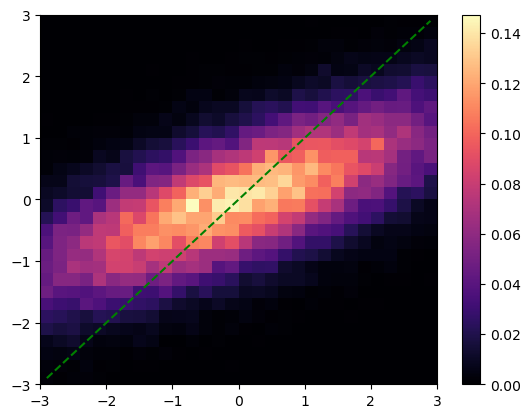

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# you can try changing rho and rerunning the simulation
rho=0.75
sx=1.0
sy=2.0

# try making plots of a multivariate normal with std=1 and mean=0
mean=np.array([0,0])
cov=np.array([[sx**2,sx*sy*rho],[sx*sy*rho,sy**2]])

samples=np.random.multivariate_normal(mean=mean,cov=cov,size=(50000))

#samples is transposed, so fix that
samples = np.transpose(np.array(samples))

#get the bin edges, centers and "area element"
bins_e=np.linspace(-3,3,31)
bins_c=0.5*(bins_e[1:]+bins_e[:-1])
dbin=(bins_e[1]-bins_e[0])**2

counts,_,_=np.histogram2d(x=samples[0],y=samples[1],bins=[bins_e,bins_e])

plt.pcolormesh(bins_c,bins_c,counts/np.sum(counts)/dbin,cmap=plt.cm.magma)
plt.colorbar()

plt.plot(bins_c,bins_c,'g--')

# meshgrid makes 2d versions of the grid cells, which is useful for making 2d functions 
#x2,y2=np.meshgrid(bins_c,bins_c)
#its useful to build functions up in steps sometimes, which I'll show here
#P=np.exp(-0.5*(x2**2+y2**2-2*rho*x2*y2)/(1-rho**2))
#P*=1/(2*np.pi*np.sqrt(1-rho**2))

#plt.contour(bins_c,bins_c,P,cmap=plt.cm.Greens,levels=np.linspace(0,0.2,5))

In [4]:
import scipy.linalg as la

# lets do some vector algebra as an example

x = np.array([0,1,2])

print('x')
print(x)

x = np.array([[0,1,2]])

#check the shape of x and its transpose now
print('shape of x and x.T')
print(x.shape, x.T.shape)

A = np.array([[1,2,3],[1,3,2],[2,3,1]])
print('A:')
print(A)
print('A.T:')
print(A.T)
print('inv(A)')
print(la.inv(A))

print('matrix product Ax')
print(np.dot(A,x.T))
#why did we have to take the transpose here?

print('matrix product A and inv(A)')
print(np.dot(la.inv(A),A))

x
[0 1 2]
shape of x and x.T
(1, 3) (3, 1)
A:
[[1 2 3]
 [1 3 2]
 [2 3 1]]
A.T:
[[1 1 2]
 [2 3 3]
 [3 2 1]]
inv(A)
[[ 0.5        -1.16666667  0.83333333]
 [-0.5         0.83333333 -0.16666667]
 [ 0.5        -0.16666667 -0.16666667]]
matrix product Ax
[[8]
 [7]
 [5]]
matrix product A and inv(A)
[[ 1.00000000e+00  4.44089210e-16  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00 -5.55111512e-17  1.00000000e+00]]


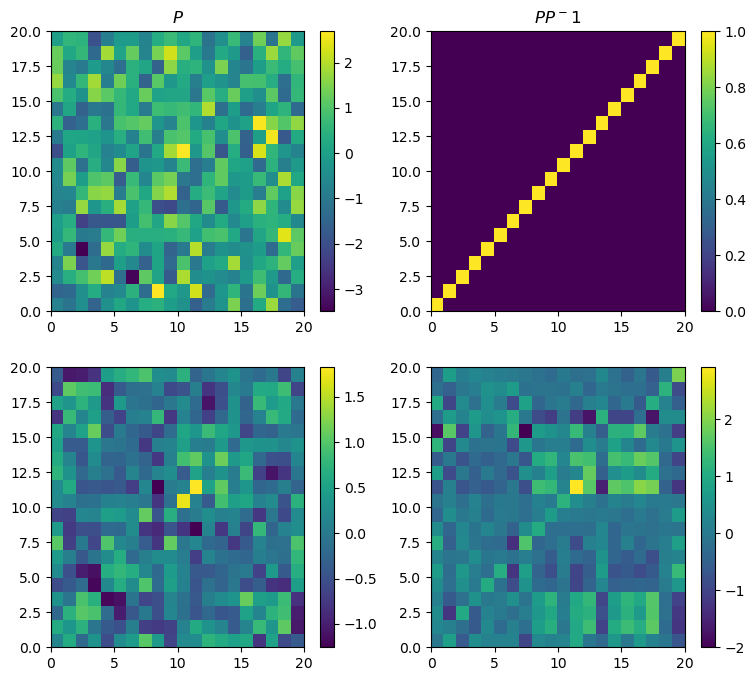

In [249]:
P=np.random.randn(20,20)
Pi=la.inv(P)
L,U = la.eig(P)
L[-1]/=1e16
P2 = np.dot(U.T,np.dot(np.diag(L),U))
P2i = la.inv(P2)

plt.figure(0,figsize=(9,8),dpi=100)

plt.subplot(2,2,1)
plt.pcolor(np.real(P))
plt.colorbar()
plt.title('$P$')

plt.subplot(2,2,2)
plt.pcolor(np.real(np.dot(P,Pi)))
plt.colorbar()
plt.title('$P P^-1$')

plt.subplot(2,2,3)
plt.pcolor(np.real(P2))
plt.colorbar()

plt.subplot(2,2,4)
plt.pcolor(np.real(np.dot(P2,P2i)))
plt.colorbar()
